# Python w analizie danych - podstawy przetwarzania danych z `pandas`
###### dr inż. Marcin Lawnik

### Pakiet `pandas`
> Python Data Analysis Library
pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

[https://pandas.pydata.org/](https://pandas.pydata.org/)

##### Instalacja

`conda install pandas`

###### Dokumentacja
[https://pandas.pydata.org/pandas-docs/version/1.2.2/](https://pandas.pydata.org/pandas-docs/version/1.2.2/)

##### `Series`

In [1]:
import pandas as pd

In [2]:
seria = pd.Series([1, -2, 3])
seria

0    1
1   -2
2    3
dtype: int64

In [3]:
seria.values

array([ 1, -2,  3], dtype=int64)

In [4]:
seria.index

RangeIndex(start=0, stop=3, step=1)

In [5]:
seria.index = ['x', 'y','z']
seria

x    1
y   -2
z    3
dtype: int64

**Uwaga** Indeksów nie można modyfikować.

In [6]:
seria_2 = seria.reindex(['z', 'y','x','w'])
seria_2

z    3.0
y   -2.0
x    1.0
w    NaN
dtype: float64

In [7]:
seria_2 = seria.reindex(['z', 'y','x','w'], fill_value=0)
seria_2

z    3
y   -2
x    1
w    0
dtype: int64

In [8]:
seria.name = 'dane'
seria

x    1
y   -2
z    3
Name: dane, dtype: int64

In [9]:
seria.index.name = 'zestawienie'
seria

zestawienie
x    1
y   -2
z    3
Name: dane, dtype: int64

In [10]:
seria = pd.Series([1, -2,  3], index=['x', 'y', 'z'])
seria

x    1
y   -2
z    3
dtype: int64

In [11]:
seria['x']

1

In [12]:
seria[['x','z']]

x    1
z    3
dtype: int64

In [13]:
seria['x':'z']

x    1
y   -2
z    3
dtype: int64

In [14]:
seria['x':'y'] = [-1,2]
seria

x   -1
y    2
z    3
dtype: int64

In [15]:
seria[seria > 0]

y    2
z    3
dtype: int64

In [16]:
'x' in seria

True

In [17]:
'w' in seria

False

In [18]:
seria = seria*2
seria

x   -2
y    4
z    6
dtype: int64

In [19]:
seria + seria

x    -4
y     8
z    12
dtype: int64

In [20]:
dane = {'x': 1, 'y': -2, 'z': 3}
seria = pd.Series(dane)
seria

x    1
y   -2
z    3
dtype: int64

In [21]:
indeksy = ['x', 'y', 'z', 'w']
seria = pd.Series(dane, index=indeksy)
seria

x    1.0
y   -2.0
z    3.0
w    NaN
dtype: float64

In [22]:
seria.isnull()

x    False
y    False
z    False
w     True
dtype: bool

In [23]:
seria.notnull()

x     True
y     True
z     True
w    False
dtype: bool

In [24]:
seria = pd.Series(['x', 'y', 'x', 'z', 'y', 'y', 'z', 'z'])

unikalne = seria.unique()
unikalne

array(['x', 'y', 'z'], dtype=object)

##### Ramki danych (DataFrame)

In [25]:
dane = {'rok': [2015, 2016, 2017, 2018],
'informatyka': [150, 125, 130, 175],
'matematyka': [250, 225, 230, 275]}
frame = pd.DataFrame(dane)
frame

,rok,informatyka,matematyka
0,2015,150,250
1,2016,125,225
2,2017,130,230
3,2018,175,275


In [26]:
frame = pd.DataFrame(dane, columns=['rok', 'matematyka', 'informatyka'])
frame

,rok,matematyka,informatyka
0,2015,250,150
1,2016,225,125
2,2017,230,130
3,2018,275,175


In [27]:
frame.columns

Index(['rok', 'matematyka', 'informatyka'], dtype='object')

In [28]:
frame.index = ['a','b','c','d']
frame

,rok,matematyka,informatyka
a,2015,250,150
b,2016,225,125
c,2017,230,130
d,2018,275,175


In [29]:
frame = pd.DataFrame(dane, columns=['rok', 'matematyka', 'informatyka', 'fizyka'])
frame

,rok,matematyka,informatyka,fizyka
0,2015,250,150,NaN
1,2016,225,125,NaN
2,2017,230,130,NaN
3,2018,275,175,NaN


In [30]:
frame.rok

0    2015
1    2016
2    2017
3    2018
Name: rok, dtype: int64

In [31]:
frame['rok']

0    2015
1    2016
2    2017
3    2018
Name: rok, dtype: int64

In [32]:
frame.fizyka = 100
frame

,rok,matematyka,informatyka,fizyka
0,2015,250,150,100
1,2016,225,125,100
2,2017,230,130,100
3,2018,275,175,100


In [33]:
frame.fizyka = pd.Series([120,100,90,80], index=[3,2,1,0])
frame

,rok,matematyka,informatyka,fizyka
0,2015,250,150,80
1,2016,225,125,90
2,2017,230,130,100
3,2018,275,175,120


In [34]:
del frame['fizyka']
frame

,rok,matematyka,informatyka
0,2015,250,150
1,2016,225,125
2,2017,230,130
3,2018,275,175


In [35]:
frame.ix[1]

C:\Users\marcin.lawnik\conda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


rok            2016
matematyka      225
informatyka     125
Name: 1, dtype: int64

In [36]:
frame.iloc[1]

rok            2016
matematyka      225
informatyka     125
Name: 1, dtype: int64

In [37]:
frame.loc[1]

rok            2016
matematyka      225
informatyka     125
Name: 1, dtype: int64

In [38]:
dane = {'matematyka': {2018: 275, 2017: 230},
 'informatyka': {2018: 175, 2017: 130}}
frame = pd.DataFrame(dane)
frame

,matematyka,informatyka
2018,275,175
2017,230,130


In [39]:
frame.T

,2018,2017
matematyka,275,230
informatyka,175,130


In [40]:
frame.index.name='rok'
frame.columns.name='kierunek'
frame

kierunek,matematyka,informatyka
rok,,
2018,275,175
2017,230,130


In [41]:
frame.values

array([[275, 175],
       [230, 130]], dtype=int64)

##### `reindex()`

In [42]:
dane = {'matematyka': {2018: 275, 2017: 230},
 'informatyka': {2018: 175, 2017: 130}}
frame = pd.DataFrame(dane)
frame

,matematyka,informatyka
2018,275,175
2017,230,130


In [43]:
frame.reindex([2016,2017,2018])

,matematyka,informatyka
2016,NaN,NaN
2017,230.0,130.0
2018,275.0,175.0


In [44]:
frame_2 = frame.reindex(columns=['fizyka','matematyka','informatyka'])
frame_2

,fizyka,matematyka,informatyka
2018,NaN,275,175
2017,NaN,230,130


In [45]:
frame_2.fizyka = [100,120]
frame_2

,fizyka,matematyka,informatyka
2018,100,275,175
2017,120,230,130


##### `drop()`

In [46]:
frame_2.drop(2017)

,fizyka,matematyka,informatyka
2018,100,275,175


In [47]:
frame_2.drop('fizyka', axis=1)

,matematyka,informatyka
2018,275,175
2017,230,130


##### Operacje na ramkach danych

In [48]:
import numpy as np
frame = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=['matematyka', 'informatyka','fizyka'],
                  index=[2016,2017,2018])
frame

,matematyka,informatyka,fizyka
2016,0.0,1.0,2.0
2017,3.0,4.0,5.0
2018,6.0,7.0,8.0


In [49]:
frame_2 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=['matematyka', 'informatyka','automatyka'],
                  index=[2015,2016,2017])
frame_2

,matematyka,informatyka,automatyka
2015,0.0,1.0,2.0
2016,3.0,4.0,5.0
2017,6.0,7.0,8.0


In [50]:
frame + frame_2

,automatyka,fizyka,informatyka,matematyka
2015,NaN,NaN,NaN,NaN
2016,NaN,NaN,5.0,3.0
2017,NaN,NaN,11.0,9.0
2018,NaN,NaN,NaN,NaN


In [51]:
frame.add(frame_2)

,automatyka,fizyka,informatyka,matematyka
2015,NaN,NaN,NaN,NaN
2016,NaN,NaN,5.0,3.0
2017,NaN,NaN,11.0,9.0
2018,NaN,NaN,NaN,NaN


In [52]:
frame.add(frame_2, fill_value=0)

,automatyka,fizyka,informatyka,matematyka
2015,2.0,NaN,1.0,0.0
2016,5.0,2.0,5.0,3.0
2017,8.0,5.0,11.0,9.0
2018,NaN,8.0,7.0,6.0


In [53]:
import numpy as np
np.sin(frame_2)

,matematyka,informatyka,automatyka
2015,0.000000,0.841471,0.909297
2016,0.141120,-0.756802,-0.958924
2017,-0.279415,0.656987,0.989358


In [54]:
frame_2.describe()

,matematyka,informatyka,automatyka
count,3.0,3.0,3.0
mean,3.0,4.0,5.0
std,3.0,3.0,3.0
min,0.0,1.0,2.0
25%,1.5,2.5,3.5
50%,3.0,4.0,5.0
75%,4.5,5.5,6.5
max,6.0,7.0,8.0


In [55]:
frame_2.T.describe()

,2015,2016,2017
count,3.0,3.0,3.0
mean,1.0,4.0,7.0
std,1.0,1.0,1.0
min,0.0,3.0,6.0
25%,0.5,3.5,6.5
50%,1.0,4.0,7.0
75%,1.5,4.5,7.5
max,2.0,5.0,8.0


**Metoda** | **Opis**
:---:|:---:
count |ilość nie-NaN-ów 
describe | podstawowe statystyki
min, max | minimum i maximum 
argmin, argmax | znajduje indeks (w postaci liczby) wartości minimum lub maximum 
sum | suma
mean | średnia
median | mediana
var | wariancja
std | odchylenie standardowe
skew | skosność (3. moment centralny) 
kurt | kurtoza (4. moment centralny) 
cumsum | skumulowana suma
diff | indeks (w szeregach czasowych)
pct_change | zmiana procentowa

In [56]:
print(frame_2)

frame_2.corr()

      matematyka  informatyka  automatyka
2015         0.0          1.0         2.0
2016         3.0          4.0         5.0
2017         6.0          7.0         8.0


,matematyka,informatyka,automatyka
matematyka,1.0,1.0,1.0
informatyka,1.0,1.0,1.0
automatyka,1.0,1.0,1.0


In [57]:
frame_2.matematyka.corr(frame_2.informatyka)

1.0

In [58]:
print(frame_2)

frame_2.cov()

      matematyka  informatyka  automatyka
2015         0.0          1.0         2.0
2016         3.0          4.0         5.0
2017         6.0          7.0         8.0


,matematyka,informatyka,automatyka
matematyka,9.0,9.0,9.0
informatyka,9.0,9.0,9.0
automatyka,9.0,9.0,9.0


In [59]:
frame_2.matematyka.cov(frame_2.informatyka)

9.0

In [60]:
print(frame_2)

f = lambda x: x.max() - x.min()

frame_2.apply(f)

      matematyka  informatyka  automatyka
2015         0.0          1.0         2.0
2016         3.0          4.0         5.0
2017         6.0          7.0         8.0


matematyka     6.0
informatyka    6.0
automatyka     6.0
dtype: float64

In [61]:
frame_2.apply(f, axis=1)

2015    2.0
2016    2.0
2017    2.0
dtype: float64

##### Brakujące dane

In [62]:
seria = pd.Series([1, np.nan, 2, 3, np.nan])
seria

0    1.0
1    NaN
2    2.0
3    3.0
4    NaN
dtype: float64

In [63]:
seria.isnull()

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [64]:
seria.count()

3

In [65]:
seria.dropna()

0    1.0
2    2.0
3    3.0
dtype: float64

In [66]:
from numpy import nan as NA
dane = pd.DataFrame([[1., 2, 3.], [1., NA, 2],
                    [NA, NA, NA], [NA, 2, 3.]])
dane

,0,1,2
0,1.0,2.0,3.0
1,1.0,NaN,2.0
2,NaN,NaN,NaN
3,NaN,2.0,3.0


In [67]:
dane.dropna()

,0,1,2
0,1.0,2.0,3.0


In [68]:
dane.count()

0    2
1    2
2    3
dtype: int64

In [69]:
dane.dropna(how='all')

,0,1,2
0,1.0,2.0,3.0
1,1.0,NaN,2.0
3,NaN,2.0,3.0


In [70]:
seria = pd.Series([1, np.nan, 2, 3, np.nan])
print(seria)

seria_2 = seria.fillna(1)
seria_2

0    1.0
1    NaN
2    2.0
3    3.0
4    NaN
dtype: float64


0    1.0
1    1.0
2    2.0
3    3.0
4    1.0
dtype: float64

In [71]:
dane = pd.DataFrame([[1., 2, 3.], [1., NA, 2],
                    [NA, NA, NA], [NA, 2, 3.]])
print(dane)

dane.fillna(1)

     0    1    2
0  1.0  2.0  3.0
1  1.0  NaN  2.0
2  NaN  NaN  NaN
3  NaN  2.0  3.0


,0,1,2
0,1.0,2.0,3.0
1,1.0,1.0,2.0
2,1.0,1.0,1.0
3,1.0,2.0,3.0


In [72]:
dane.fillna({0:2, 2:1})

,0,1,2
0,1.0,2.0,3.0
1,1.0,NaN,2.0
2,2.0,NaN,1.0
3,2.0,2.0,3.0


##### Filtrowanie danych

In [73]:
dane = {'matematyka': {2019: 250, 2018: 275, 2017: 230},
 'informatyka': {2019: 230, 2018: 175, 2017: 130}}

frame = pd.DataFrame(dane, columns=['matematyka', 'informatyka'],
                  index=[2017,2018,2019])
frame

,matematyka,informatyka
2017,230,130
2018,275,175
2019,250,230


In [74]:
frame.matematyka[frame.matematyka > 249]

2018    275
2019    250
Name: matematyka, dtype: int64

In [76]:
frame.matematyka > 249

2017    False
2018     True
2019     True
Name: matematyka, dtype: bool

In [81]:
frame.matematyka[(frame.matematyka > 249) & (frame.matematyka < 251)]

2019    250
Name: matematyka, dtype: int64

In [84]:
frame.matematyka.isin([230,250])

2017     True
2018    False
2019     True
Name: matematyka, dtype: bool

In [87]:
frame.loc[frame.matematyka > 249]

,matematyka,informatyka
2018,275,175
2019,250,230


### Formaty plików

**CSV** (ang. comma-separated values) – format przechowywania danych w plikach tekstowych


In [1]:
import pandas as pd
grunty = pd.read_csv('grunty.csv', sep=',')
grunty.head()

,Kod,Nazwa,grunty orne ogółem;2017;[zł],"grunty orne dobre (klasy I, II, IIIa);2017;[zł]","grunty orne średnie (klasy IIIb, IV);2017;[zł]","grunty orne słabe (klasy V, VI);2017;[zł]",łąki ogółem;2017;[zł],łąki dobre;2017;[zł],łąki słabe;2017;[zł]
0,0,POLSKA,41288,52586,42196,29277,25681,27655,22320
1,200000,DOLNOŚLĄSKIE,36591,47622,36422,26295,29949,31636,20666
2,400000,KUJAWSKO-POMORSKIE,55784,66686,55657,37706,33374,35828,27944
3,600000,LUBELSKIE,30680,43869,30297,19315,14607,15898,12166
4,800000,LUBUSKIE,28800,41961,30347,24100,19755,20290,19000


In [4]:
grunty[['grunty orne dobre (klasy I, II, IIIa);2017;[zł]']]

,"grunty orne dobre (klasy I, II, IIIa);2017;[zł]"
0,52586
1,47622
2,66686
3,43869
4,41961
5,50128
6,37962
7,55444
8,67012
9,30010


##### Pliki xls

[https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html](https://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.read_excel.html)

In [5]:
grunty_xls = pd.read_excel('grunty.xlsx')
grunty_xls

,Kategoria:,CENY
0,NaN,Przeciętne ceny producentów dotyczą rynku kraj...
1,Grupa:,CENY W ROLNICTWIE
2,NaN,-
3,Podgrupa:,Cena zakupu/sprzedaży użytków rolnych za 1 ha ...
4,NaN,-
5,Data ostatniej aktualizacji:,2018-02-28
6,Wymiary:,Użytki rolne; Rok
7,Przypisy:,Znak '-' oznacza brak informacji z powodu: zmi...


In [6]:
grunty_xls = pd.read_excel('grunty.xlsx', sheet_name='TABLICA')
grunty_xls

,Kod,Nazwa,grunty orne ogółem,"grunty orne dobre (klasy I, II, IIIa)","grunty orne średnie (klasy IIIb, IV)","grunty orne słabe (klasy V, VI)",łąki ogółem,łąki dobre,łąki słabe
0,NaN,NaN,2017,2017,2017,2017,2017,2017,2017
1,NaN,NaN,[zł],[zł],[zł],[zł],[zł],[zł],[zł]
2,0.0,POLSKA,41288,52586,42196,29277,25681,27655,22320
3,200000.0,DOLNOŚLĄSKIE,36591,47622,36422,26295,29949,31636,20666
4,400000.0,KUJAWSKO-POMORSKIE,55784,66686,55657,37706,33374,35828,27944
5,600000.0,LUBELSKIE,30680,43869,30297,19315,14607,15898,12166
6,800000.0,LUBUSKIE,28800,41961,30347,24100,19755,20290,19000
7,1000000.0,ŁÓDZKIE,36074,50128,38074,26065,22771,25294,18135
8,1200000.0,MAŁOPOLSKIE,30857,37962,28552,22540,21695,22528,16647
9,1400000.0,MAZOWIECKIE,39193,55444,39975,29729,28997,31257,25993


**Czytanie stron internetowych**

[stany USA](https://simple.wikipedia.org/wiki/List_of_U.S._states)

In [7]:
stany = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states') 
stany

[          Name &postal abbs. [1]                          Unnamed: 2_level_0  \
           Name &postal abbs. [1] Name &postal abbs. [1].1 Unnamed: 2_level_1   
 0                        Alabama                      NaN                 AL   
 1                         Alaska                      NaN                 AK   
 2                        Arizona                      NaN                 AZ   
 3                       Arkansas                      NaN                 AR   
 4                     California                      NaN                 CA   
 5                       Colorado                      NaN                 CO   
 6                    Connecticut                      NaN                 CT   
 7                       Delaware                      NaN                 DE   
 8                        Florida                      NaN                 FL   
 9                        Georgia                      NaN                 GA   
 10                        H

In [8]:
stany[0]

Name &postal abbs. [1]                          Unnamed: 2_level_0  \
          Name &postal abbs. [1] Name &postal abbs. [1].1 Unnamed: 2_level_1   
0                        Alabama                      NaN                 AL   
1                         Alaska                      NaN                 AK   
2                        Arizona                      NaN                 AZ   
3                       Arkansas                      NaN                 AR   
4                     California                      NaN                 CA   
5                       Colorado                      NaN                 CO   
6                    Connecticut                      NaN                 CT   
7                       Delaware                      NaN                 DE   
8                        Florida                      NaN                 FL   
9                        Georgia                      NaN                 GA   
10                        Hawaii                      NaN                 HI   
11                         Idaho                      NaN                 ID   
12                      Illinois                      NaN                 IL   
13                       Indiana                      NaN                 IN   
14                          Iowa                      NaN                 IA   
15                        Kansas                      NaN                 KS   
16       Kentucky[upper-alpha 3]                      NaN                 KY   
17                     Louisiana                      NaN                 LA   
18                         Maine                      NaN                 ME   
19                      Maryland                      NaN                 MD   
20  Massachusetts[upper-alpha 3]                      NaN                 MA   
21                      Michigan                      NaN                 MI   
22                     Minnesota                      NaN                 MN   
23                   Mississippi                      NaN                 MS   
24                      Missouri                      NaN                 MO   
25                       Montana                      NaN                 MT   
26                      Nebraska                      NaN                 NE   
27                        Nevada                      NaN                 NV   
28                 New Hampshire                      NaN                 NH   
29                    New Jersey                      NaN                 NJ   
30                    New Mexico                      NaN                 NM   
31                      New York                      NaN                 NY   
32                North Carolina                      NaN                 NC   
33                  North Dakota                      NaN                 ND   
34                          Ohio                      NaN                 OH   
35                      Oklahoma                      NaN                 OK   
36                        Oregon                      NaN                 OR   
37   Pennsylvania[upper-alpha 3]                      NaN                 PA   
38                  Rhode Island                      NaN                 RI   
39                South Carolina                      NaN                 SC   
40                  South Dakota                      NaN                 SD   
41                     Tennessee                      NaN                 TN   
42                         Texas                      NaN                 TX   
43                          Utah                      NaN                 UT   
44                       Vermont                      NaN                 VT   
45       Virginia[upper-alpha 3]                      NaN                 VA   
46                    Washington                      NaN                 WA   
47                 West Virginia                      NaN                 WV   
48        

**Przykład z wykorzystaniem wizualizacji**

In [9]:
grunty_xls = pd.read_excel('grunty.xlsx', sheet_name='TABLICA')
grunty_xls

,Kod,Nazwa,grunty orne ogółem,"grunty orne dobre (klasy I, II, IIIa)","grunty orne średnie (klasy IIIb, IV)","grunty orne słabe (klasy V, VI)",łąki ogółem,łąki dobre,łąki słabe
0,NaN,NaN,2017,2017,2017,2017,2017,2017,2017
1,NaN,NaN,[zł],[zł],[zł],[zł],[zł],[zł],[zł]
2,0.0,POLSKA,41288,52586,42196,29277,25681,27655,22320
3,200000.0,DOLNOŚLĄSKIE,36591,47622,36422,26295,29949,31636,20666
4,400000.0,KUJAWSKO-POMORSKIE,55784,66686,55657,37706,33374,35828,27944
5,600000.0,LUBELSKIE,30680,43869,30297,19315,14607,15898,12166
6,800000.0,LUBUSKIE,28800,41961,30347,24100,19755,20290,19000
7,1000000.0,ŁÓDZKIE,36074,50128,38074,26065,22771,25294,18135
8,1200000.0,MAŁOPOLSKIE,30857,37962,28552,22540,21695,22528,16647
9,1400000.0,MAZOWIECKIE,39193,55444,39975,29729,28997,31257,25993


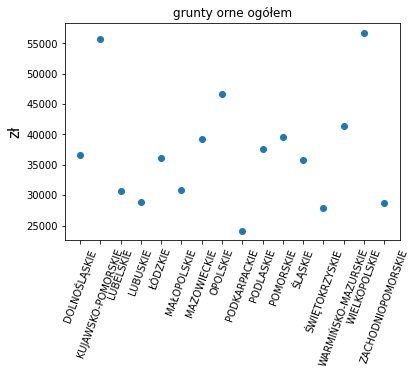

In [90]:
import matplotlib.pyplot as plt

grunty = grunty_xls['grunty orne ogółem'][3:]
nazwa = grunty_xls['Nazwa'][3:]

plt.plot(range(16), grunty, "o")
plt.xticks(range(16), nazwa, rotation=70)
plt.title('grunty orne ogółem')
plt.ylabel('zł', fontsize=15)

plt.show()

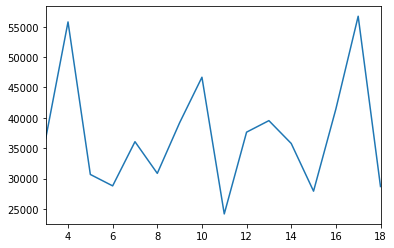

In [94]:
grunty.plot()

Więcej na temat wykresów w `pandas` [https://pandas.pydata.org/pandas-docs/version/1.2.2/getting_started/intro_tutorials/04_plotting.html](https://pandas.pydata.org/pandas-docs/version/1.2.2/getting_started/intro_tutorials/04_plotting.html)

### Dziękuję za uwagę